Factors: operational cost (gas costs + maintanance costs), electricity price, last 8 year production numbers average.
Predicts: Next year's production numbers

In [1]:
%matplotlib inline  
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
import numpy as np
from scipy.optimize import curve_fit

data_file = pd.read_excel(r'data.xlsx')
data = {}
yr = range(2007, 2019)

for count in range(len(data_file['Year'])):
    year = data_file['Year'][count]
    data[year] = {"op_cost": data_file['Operational Cost'][count], "elec_price": data_file['Electricity Price'][count], "prod_average": data_file['Production Average'][count], "prod_nums": data_file['Production Numbers'][count]}

print("Data loaded")

Data loaded


In [2]:
features, labels = [], []

for year in yr:
    yr_data = data[year]
    labels.append([float(yr_data["prod_nums"])])
    features.append([yr_data["op_cost"], yr_data["elec_price"], yr_data["prod_average"]])

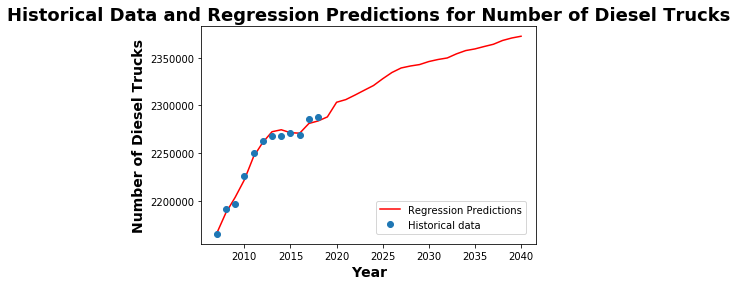

In [3]:
autoencoder = LinearRegression()
autoencoder.fit(features, labels)
yr_encoded = []
for n in range(2007, 2041):
    yr_encoded.append(n)
pred_input = []
for year in yr_encoded:
    yr_data = data[year]
    pred_input.append([yr_data["op_cost"], yr_data["elec_price"], yr_data["prod_average"]])
encoded = autoencoder.predict(pred_input)

#print(y_pred, labels)
plt.plot(yr_encoded, encoded, "r", label="Regression Predictions")
plt.plot(yr, labels, "o", label="Historical data")
plt.legend(loc="lower right", borderaxespad=1)
plt.xlabel("Year", weight="bold", size=14)
plt.ylabel("Number of Diesel Trucks", weight="bold", size=14)
plt.title("Historical Data and Regression Predictions for Number of Diesel Trucks", weight="bold", size=18)
plt.savefig('figures/figure1.png', bbox_inches='tight')

y = 110133.4310002604*log(x-2000) + 1970569.4906816229


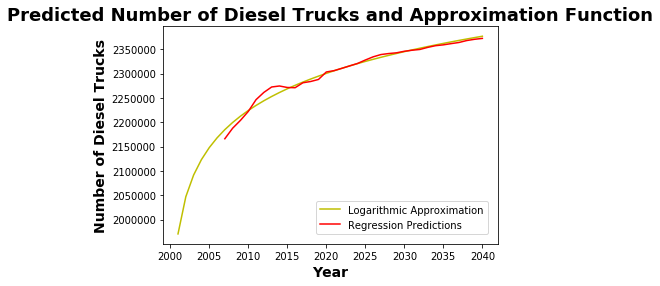

In [4]:
yr_encoded = [x-2000 for x in yr_encoded]
a, b = np.polyfit(np.log(yr_encoded), encoded, 1)
x = np.linspace(2001, 2040, 40)
y = a*np.log(x-2000) + b
print("y = " + str(a) + "*log(x-2000) + " + str(b))

yr_encoded = [c+2000 for c in yr_encoded]

plt.plot(x, y, 'y', label="Logarithmic Approximation")
plt.plot(yr_encoded, encoded, 'r', label="Regression Predictions")
plt.legend(loc="lower right", borderaxespad=1)
plt.xlabel("Year", weight="bold", size=14)
plt.ylabel("Number of Diesel Trucks", weight="bold", size=14)
plt.title("Predicted Number of Diesel Trucks and Approximation Function", weight="bold", size=18)
plt.savefig('figures/figure2.png', bbox_inches='tight')

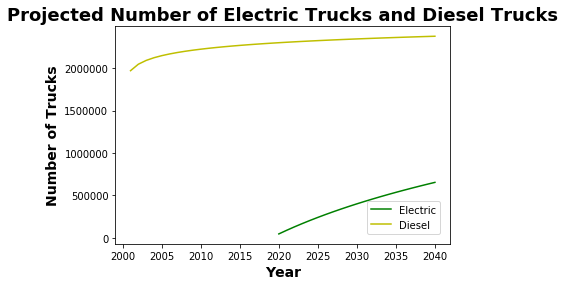

In [5]:
num_electric = 0
num_arr = []
for n in range(2020, 2041):
    num_electric += ((8.11*a)/(n - 2000))
    num_arr.append(num_electric)

plt.plot(range(2020, 2041), num_arr, 'g', label="Electric")
plt.plot(x, y, 'y', label="Diesel")
plt.legend(loc="lower right", borderaxespad=1)
plt.xlabel("Year", weight="bold", size=14)
plt.ylabel("Number of Trucks", weight="bold", size=14)
plt.title("Projected Number of Electric Trucks and Diesel Trucks", weight="bold", size=18)
plt.savefig('figures/figure3.png', bbox_inches='tight')

2020 0.018999571413616113
2021 0.0363572753803756
2022 0.052294334338901245
2023 0.0669928019721923
2024 0.08060398236803967
2025 0.09325475074407664
2026 0.10505236439227553
2027 0.11608817048734349
2028 0.1264404964774208
2029 0.1361769269416141
2030 0.1453561144811178
2031 0.15402923285082748
2032 0.16224115263699074
2033 0.170031399746736
2034 0.17743494240620433
2035 0.18448284165183376
2036 0.1912027923397731
2037 0.1976195757257387
2038 0.20375544014449404
2039 0.2096304228630571


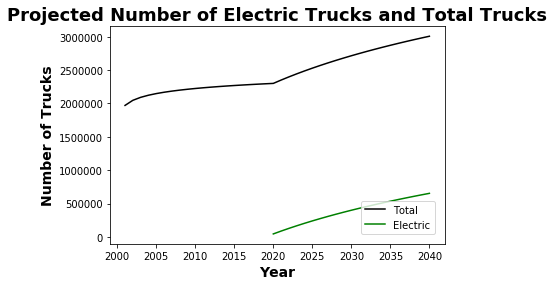

In [6]:
total_trucks = []
for n in range(0, 40):
    if n < 20:
        total_trucks.append(y[n])
    else:
        total_trucks.append(y[n] + num_arr[n-20])
        print(2000+n, num_arr[n-20] / (y[n] + num_arr[n-20]))

plt.plot(range(2001, 2041), total_trucks, color="black", label="Total")
plt.plot(range(2020, 2041), num_arr, 'g', label="Electric")
plt.legend(loc="lower right", borderaxespad=1)
plt.xlabel("Year", weight="bold", size=14)
plt.ylabel("Number of Trucks", weight="bold", size=14)
plt.title("Projected Number of Electric Trucks and Total Trucks", weight="bold", size=18)
plt.savefig('figures/figure4.png', bbox_inches='tight')